In [1]:
import numpy as np
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
import math

In [73]:
names = pd.read_csv('/home/simon/Crown_Model/Crown_Ecoli_STAT_v2_FJ_3_run3_uniform_parameterNames.csv',header=None)
names2 = pd.read_csv("/home/simon/crown_xml_ids.csv",header=None)

In [74]:
names2 = names2[1][1:]

In [4]:
names2

1              EMP1_v1
2          EMP2_v2_fwd
3          EMP2_v2_bwd
4              EMP3_v3
5          EMP4_v4_fwd
            ...       
98     TH1_v63___1_fwd
99     TH1_v63___1_bwd
100      TP3_v67___1_e
101        TP3_v67___1
102        mu2_v70___1
Name: 1, Length: 102, dtype: object

In [5]:
print(names)

                      0
0         AA8_v44___1.x
1         AA9_v45___1.x
2         AC1_v35___1.n
3         AC1_v35___1.x
4        ANA1_v31___1.n
5        ANA3_v33___1.n
6             EMP2_v2.x
7             EMP4_v4.x
8             EMP5_v5.x
9             EMP6_v6.x
10            EMP7_v7.x
11            EMP8_v8.n
12       GAS2_v71___1.n
13       GOX1_v29___1.x
14  M_atp_cH1_v64___1.n
15       PPP3_v11___1.x
16       PPP4_v12___1.x
17       PPP5_v13___1.x
18       PPP6_v14___1.x
19       PPP7_v15___1.x
20       PPP8_v16___1.x
21       PPP9_v17___1.x
22           TCA1_v20.n
23       TCA3_v22___1.x
24           TCA4_v23.x
25       TCA6_v25___1.x
26       TCA7_v26___1.x
27       TCA8_v27___1.x
28       TCA9_v28___1.n
29       TCA9_v28___1.x
30        TH1_v63___1.n
31        TH1_v63___1.x
32        mu2_v70___1.n


In [6]:
uniform1 = pd.read_csv('/home/simon/Crown_Model/Crown_Ecoli_STAT_v2_FJ_3_run3_uniform_states.csv',header=None)


In [69]:
hops1 = pd.read_csv('/home/simon/sampler_and_csv_crown/samples_5_400D_states.csv',header=None)


In [70]:
uniform1.columns = names


In [71]:
hops1

0            1           2          3           4           5    \
0       100   762.229018  685.397299  74.613923  558.600138  483.986215   
1       100   583.869033  535.914889  67.058222  949.264271  882.206049   
2       100   634.750459  604.692010  40.193461  370.220345  330.026884   
3       100   866.701417  861.268545  32.678642  571.678874  539.000232   
4       100  1017.565237  954.732507  70.635251  349.992642  279.357390   
...     ...          ...         ...        ...         ...         ...   
399995  100  1066.541384  994.130009  73.951256  632.822563  558.871307   
399996  100   858.849857  814.951814  72.383471  184.036413  111.652941   
399997  100   347.931735  316.402063  32.157812  127.651773   95.493961   
399998  100   809.748759  719.283908  91.301997  725.874360  634.572363   
399999  100   592.427265  514.119824  80.765227  332.741231  251.976004   

                6           7            8           9    ...         121  \
0        168.431781   93.817859   717.653218  549.473683  ...  120.411982   
1        477.143627  410.085405   651.098920  491.123329  ...  138.391242   
2        719.924478  679.731018   631.710119  494.263506  ...  677.339882   
3        316.672383  283.993741   136.302482    7.281484  ...  401.992660   
4       1021.312726  950.677475   227.731762   65.031401  ...  192.346321   
...             ...         ...          ...         ...  ...         ...   
399995   198.567024  124.615768   301.881076  129.648816  ...  516.979985   
399996   128.170940   55.787468   862.783443  693.900469  ...  332.116729   
399997   865.281696  833.123884  1108.440524  978.961739  ...  668.537327   
399998   709.666268  618.364271   953.667687  768.323158  ...  109.299371   
399999   364.527584  283.762357   211.969603   35.838326  ...  734.728245   

               122       123         124         125         126        127  \
0       315.637614  0.915202   96.161029   96.161029  132.872116  21.433307   
1       306.135587  1.007405  390.277392  390.277392  146.258522  23.592639   
2       385.323044  0.390701  396.362673  396.362673   56.723270   9.149905   
3       392.037936  0.520249  887.103887  887.103887   75.531476  12.183815   
4       258.053637  1.128627  877.948232  877.948232  163.857948  26.431563   
...            ...       ...         ...         ...         ...        ...   
399995  422.421228  0.244503  245.267704  245.267704   35.497812   5.726073   
399996  398.578260  0.497897   90.814342   90.814342   72.286362  11.660353   
399997  399.191106  0.381054  509.107962  509.107962   55.322734   8.923988   
399998  326.073183  0.847367  337.982960  337.982960  123.023569  19.844660   
399999  336.687197  0.659115  390.487149  390.487149   95.692504  15.435946   

             128       129       130  
0       5.814929  3.996514  3.996514  
1       6.400762  4.399149  4.399149  
2       2.482400  1.706117  1.706117  
3       3.305510  2.271828  2.271828  
4       7.170972  4.928503  4.928503  
...          ...       ...       ...  
399995  1.553503  1.067700  1.067700  
399996  3.163493  2.174222  2.174222  
399997  2.421108  1.663992  1.663992  
399998  5.383923  3.700291  3.700291  
399999  4.187824  2.878230  2.878230  

[400000 rows x 131 columns]

In [75]:
hops1.columns = names2

In [76]:
hops1

1       EMP1_v1  EMP2_v2_fwd  EMP2_v2_bwd    EMP3_v3  EMP4_v4_fwd  \
0           100   762.229018   685.397299  74.613923   558.600138   
1           100   583.869033   535.914889  67.058222   949.264271   
2           100   634.750459   604.692010  40.193461   370.220345   
3           100   866.701417   861.268545  32.678642   571.678874   
4           100  1017.565237   954.732507  70.635251   349.992642   
...         ...          ...          ...        ...          ...   
399995      100  1066.541384   994.130009  73.951256   632.822563   
399996      100   858.849857   814.951814  72.383471   184.036413   
399997      100   347.931735   316.402063  32.157812   127.651773   
399998      100   809.748759   719.283908  91.301997   725.874360   
399999      100   592.427265   514.119824  80.765227   332.741231   

1       EMP4_v4_bwd  EMP5_v5_fwd  EMP5_v5_bwd  EMP6_v6_fwd  EMP6_v6_bwd  ...  \
0        483.986215   168.431781    93.817859   717.653218   549.473683  ...   
1        882.206049   477.143627   410.085405   651.098920   491.123329  ...   
2        330.026884   719.924478   679.731018   631.710119   494.263506  ...   
3        539.000232   316.672383   283.993741   136.302482     7.281484  ...   
4        279.357390  1021.312726   950.677475   227.731762    65.031401  ...   
...             ...          ...          ...          ...          ...  ...   
399995   558.871307   198.567024   124.615768   301.881076   129.648816  ...   
399996   111.652941   128.170940    55.787468   862.783443   693.900469  ...   
399997    95.493961   865.281696   833.123884  1108.440524   978.961739  ...   
399998   634.572363   709.666268   618.364271   953.667687   768.323158  ...   
399999   251.976004   364.527584   283.762357   211.969603    35.838326  ...   

1       TH1_v63___1_bwd  TP3_v67___1  Asp_bm___1  GAS1_M_co2_c_ext___1  \
0            120.411982   315.637614    0.915202             96.161029   
1            138.391242   306.135587    1.007405            390.277392   
2            677.339882   385.323044    0.390701            396.362673   
3            401.992660   392.037936    0.520249            887.103887   
4            192.346321   258.053637    1.128627            877.948232   
...                 ...          ...         ...                   ...   
399995       516.979985   422.421228    0.244503            245.267704   
399996       332.116729   398.578260    0.497897             90.814342   
399997       668.537327   399.191106    0.381054            509.107962   
399998       109.299371   326.073183    0.847367            337.982960   
399999       734.728245   336.687197    0.659115            390.487149   

1       GAS3_M_co2_c_out___1  M_atp_c_bm___1  NM_adp_cH_bm___1  NADH_bm___1  \
0                  96.161029      132.872116         21.433307     5.814929   
1                 390.277392      146.258522         23.592639     6.400762   
2                 396.362673       56.723270          9.149905     2.482400   
3                 887.103887       75.531476         12.183815     3.305510   
4                 877.948232      163.857948         26.431563     7.170972   
...                      ...             ...               ...          ...   
399995            245.267704       35.497812          5.726073     1.553503   
399996             90.814342       72.286362         11.660353     3.163493   
399997            509.107962       55.322734          8.923988     2.421108   
399998            337.982960      123.023569         19.844660     5.383923   
399999            390.487149       95.692504         15.435946     4.187824   

1       mu2_v70___1  mu_3___1  
0          3.996514  3.996514  
1          4.399149  4.399149  
2          1.706117  1.706117  
3          2.271828  2.271828  
4          4.928503  4.928503  
...             ...       ...  
399995     1.067700  1.067700  
399996     2.174222  2.174222  
399997     1.663992  1.663992  
399998     3.700291  3.700291  
399999     2.878230 

array([[<AxesSubplot:title={'center':'mu2_v70___1'}>,
        <AxesSubplot:title={'center':'mu_3___1'}>]], dtype=object)

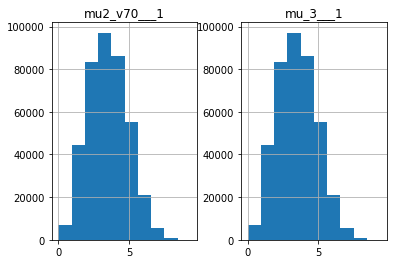

In [77]:
hops1[[i for i in hops1.columns if "mu" in i]].hist()

## Create columns in vfwd for non bwd fwd fluxes ** to do

In [78]:
vbwd = hops1[[i for i in hops1.columns if "bwd" in i]]

In [79]:
vfwd = hops1[[i for i in hops1.columns if "fwd" in i]]

In [80]:
vfwd

1       EMP2_v2_fwd  EMP4_v4_fwd  EMP5_v5_fwd  EMP6_v6_fwd  EMP7_v7_fwd  \
0        762.229018   558.600138   168.431781   717.653218   354.328310   
1        583.869033   949.264271   477.143627   651.098920   403.977042   
2        634.750459   370.220345   719.924478   631.710119   210.461228   
3        866.701417   571.678874   316.672383   136.302482   615.079854   
4       1017.565237   349.992642  1021.312726   227.731762   274.670532   
...             ...          ...          ...          ...          ...   
399995  1066.541384   632.822563   198.567024   301.881076  1153.109049   
399996   858.849857   184.036413   128.170940   862.783443  1086.536287   
399997   347.931735   127.651773   865.281696  1108.440524   870.838892   
399998   809.748759   725.874360   709.666268   953.667687  1117.051786   
399999   592.427265   332.741231   364.527584   211.969603   425.206173   

1       TCA4_v23_fwd  TCA6_v25___1_fwd  TCA7_v26___1_fwd  TCA8_v27___1_fwd  \
0         448.394211        361.539862        200.250161        327.864174   
1         302.238141        890.475695        381.246739        808.404255   
2         467.897237        434.199621       1029.402182        412.578429   
3         490.755324        416.141930        128.249694        266.726619   
4          56.348210        708.950609        837.236572        522.144914   
...              ...               ...               ...               ...   
399995    581.398854        657.521566        759.198571        772.706896   
399996    895.016886         42.442684        165.755657        197.082196   
399997   1018.857415        314.913377        538.108457        114.099212   
399998    825.661888       1077.267248        219.246121        307.811233   
399999    891.142805        442.076326        138.291657        155.928575   

1       TCA9_v28___1_fwd  ...  AA8_v44___1_fwd  PPP5_v13___1_fwd  \
0             246.844573  ...       191.005416        447.794582   
1             159.678097  ...       149.463606        477.402415   
2             928.945122  ...       760.599133         98.246449   
3             567.099718  ...       832.770186        655.499169   
4             922.571254  ...       381.519890        379.483128   
...                  ...  ...              ...               ...   
399995        817.468294  ...       527.845014        852.813582   
399996        922.776193  ...       695.308055        539.640727   
399997       1081.073046  ...       301.639768        815.854758   
399998        461.946625  ...       304.754682        643.826402   
399999        408.995982  ...       936.128027        425.221225   

1       PPP6_v14___1_fwd  PPP7_v15___1_fwd  PPP8_v16___1_fwd  \
0             386.656772        175.629175        917.370858   
1             395.917447        554.029671        230.440266   
2             961.734161        961.923533        860.018598   
3             474.501645        324.145568        741.861540   
4             964.471812        998.089041        925.116890   
...                  ...               ...               ...   
399995        170.285407        913.614812        297.784686   
399996        266.255364        723.576418        365.328384   
399997        416.966766        962.866523        105.833221   
399998        449.407573        407.887110        692.430105   
399999        356.643026        540.424171        384.911136   

1       PPP9_v17___1_fwd  TCA3_v22___1_fwd  GOX1_v29___1_fwd  AA9_v45___1_fwd  \
0             561.155628        996.881372        738.170153       414.266047   
1             801.784927        220.290923        986.167131       874.981753   
2             946.218387        903.953863        726.105025       809.037051   
3             193.673230        297.768306        294.561649       438.130216   
4             182.857436        821.355716        211.715501       678.477977   
...                  ...               ...               ...              ...   
399995   

In [81]:
vbwd

1       EMP2_v2_bwd  EMP4_v4_bwd  EMP5_v5_bwd  EMP6_v6_bwd  EMP7_v7_bwd  \
0        685.397299   483.986215    93.817859   549.473683   192.728794   
1        535.914889   882.206049   410.085405   491.123329   247.827193   
2        604.692010   330.026884   679.731018   494.263506    74.133221   
3        861.268545   539.000232   283.993741     7.281484   487.861183   
4        954.732507   279.357390   950.677475    65.031401   119.430993   
...             ...          ...          ...          ...          ...   
399995   994.130009   558.871307   124.615768   129.648816   982.463944   
399996   814.951814   111.652941    55.787468   693.900469   920.277019   
399997   316.402063    95.493961   833.123884   978.961739   743.161126   
399998   719.283908   634.572363   618.364271   768.323158   935.453061   
399999   514.119824   251.976004   283.762357    35.838326   252.317858   

1       TCA4_v23_bwd  TCA6_v25___1_bwd  TCA7_v26___1_bwd  TCA8_v27___1_bwd  \
0         423.414687        342.754936        117.108331        243.239638   
1         287.553161        882.609397        307.660181        733.185613   
2         448.898849        417.845714        929.780713        312.323991   
3         480.347710        409.255649         30.150933        167.785010   
4          39.788456        700.030035        781.596487        464.676355   
...              ...               ...               ...               ...   
399995    549.243573        627.021219        642.118160        655.230368   
399996    889.911121         40.706964         66.580022         97.099925   
399997    967.480789        266.115939        427.806521          3.179935   
399998    738.338742        995.679553        131.862240        219.054545   
399999    838.972065        394.366842         52.242433         68.811528   

1       TCA9_v28___1_bwd  ...  AA8_v44___1_bwd  PPP5_v13___1_bwd  \
0             137.763984  ...       188.865525        449.728626   
1              77.983795  ...       150.525319        457.985997   
2             791.581971  ...       761.376024         87.990303   
3             454.450668  ...       833.491860        628.092099   
4             859.727747  ...       379.534634        371.330683   
...                  ...  ...              ...               ...   
399995        662.804389  ...       527.444073        851.197894   
399996        776.610158  ...       695.099910        511.000928   
399997        955.827864  ...       301.687444        815.108475   
399998        408.856213  ...       305.119901        642.726536   
399999        314.632050  ...       936.082778        422.559085   

1       PPP6_v14___1_bwd  PPP7_v15___1_bwd  PPP8_v16___1_bwd  \
0             384.968379        175.874826        917.616509   
1             404.831610        543.527416        219.938011   
2             966.554279        956.487506        854.582571   
3             487.795114        310.031968        727.747940   
4             967.658440        993.123224        920.151072   
...                  ...               ...               ...   
399995        170.900531        912.614248        296.784122   
399996        280.182816        708.864072        350.616037   
399997        417.039557        962.193032        105.159729   
399998        449.289603        406.669274        691.212269   
399999        357.454575        538.573581        383.060545   

1       PPP9_v17___1_bwd  TCA3_v22___1_bwd  GOX1_v29___1_bwd  AA9_v45___1_bwd  \
0             561.401279        909.431300        675.699604       413.692305   
1             791.282671        141.962081        922.523269       870.933018   
2             940.782360        802.493200        643.642750       807.101707   
3             179.559630        197.220514        204.421471       435.865970   
4             177.891618        760.402704        167.322244       677.116778   
...                  ...               ...               ...              ...   
399995   

In [82]:
vfwd.columns = [i[:-4] for i in vfwd.columns]
vbwd.columns = [i[:-4] for i in vbwd.columns]
vnet = vfwd - vbwd
vnet.columns = [i+".n" for i in vnet.columns]
vnet

EMP2_v2.n  EMP4_v4.n  EMP5_v5.n   EMP6_v6.n   EMP7_v7.n  TCA4_v23.n  \
0       76.831719  74.613923  74.613923  168.179534  161.599516   24.979524   
1       47.954143  67.058222  67.058222  159.975591  156.149849   14.684980   
2       30.058449  40.193461  40.193461  137.446612  136.328007   18.998388   
3        5.432872  32.678642  32.678642  129.020998  127.218671   10.407614   
4       62.832730  70.635251  70.635251  162.700361  155.239538   16.559754   
...           ...        ...        ...         ...         ...         ...   
399995  72.411375  73.951256  73.951256  172.232260  170.645104   32.155281   
399996  43.898043  72.383471  72.383471  168.882974  166.259268    5.105764   
399997  31.529673  32.157812  32.157812  129.478785  127.677766   51.376626   
399998  90.464851  91.301997  91.301997  185.344529  181.598725   87.323146   
399999  78.307441  80.765227  80.765227  176.131277  172.888315   52.170739   

        TCA6_v25___1.n  TCA7_v26___1.n  TCA8_v27___1.n  TCA9_v28___1.n  ...  \
0            18.784926       83.141829       84.624536      109.080589  ...   
1             7.866298       73.586558       75.218643       81.694302  ...   
2            16.353907       99.621469      100.254438      137.363151  ...   
3             6.886280       98.098761       98.941609      112.649050  ...   
4             8.920574       55.640085       57.468559       62.843507  ...   
...                ...             ...             ...             ...  ...   
399995       30.500346      117.080411      117.476528      154.663905  ...   
399996        1.735720       99.175635       99.982271      146.166036  ...   
399997       48.797438      110.301937      110.919278      125.245182  ...   
399998       81.587695       87.383881       88.756689       53.090412  ...   
399999       47.709483       86.049223       87.117047       94.363932  ...   

        AA8_v44___1.n  PPP5_v13___1.n  PPP6_v14___1.n  PPP7_v15___1.n  \
0            2.139891       -1.934044        1.688393       -0.245651   
1           -1.061713       19.416418       -8.914163       10.502256   
2           -0.776891       10.256146       -4.820119        5.436027   
3           -0.721674       27.407070      -13.293470       14.113600   
4            1.985256        8.152446       -3.186628        4.965818   
...               ...             ...             ...             ...   
399995       0.400941        1.615688       -0.615124        1.000564   
399996       0.208145       28.639799      -13.927452       14.712346   
399997      -0.047675        0.746282       -0.072791        0.673492   
399998      -0.365219        1.099866        0.117969        1.217836   
399999       0.045249        2.662140       -0.811550        1.850591   

        PPP8_v16___1.n  PPP9_v17___1.n  TCA3_v22___1.n  GOX1_v29___1.n  \
0            -0.245651       -0.245651       87.450072       62.470548   
1            10.502256       10.502256       78.328841       63.643861   
2             5.436027        5.436027      101.460663       82.462275   
3            14.113600       14.113600      100.547792       90.140178   
4             4.965818        4.965818       60.953011       44.393257   
...                ...             ...             ...             ...   
399995        1.000564        1.000564      118.231392       86.076111   
399996       14.712346       14.712346      101.519446       96.413682   
399997        0.673492        0.673492      112.095720       60.719094   
399998        1.217836        1.217836       91.372794        4.049648   
399999        1.850591        1.850591       89.151955       36.981216   

        AA9_v45___1.n  TH1_v63___1.n  
0            0.573742     -13.214623  
1            4.048735     -50.636231  
2            1.935344     -97.342277  
3            2.264245    -137.944377  
4            1.361198       2.260158  
...               ...            ...  
399995       0.324027     -79.882756  
399996       1.268152     -80.99

In [83]:
vxch =  pd.DataFrame()
for i in vfwd.columns:
    vxch[i+".x"] = [min(vfwd[i][k],vbwd[i][k]) for k in range(0,len(vfwd[i]))]
vxch

EMP2_v2.x   EMP4_v4.x   EMP5_v5.x   EMP6_v6.x   EMP7_v7.x  \
0       685.397299  483.986215   93.817859  549.473683  192.728794   
1       535.914889  882.206049  410.085405  491.123329  247.827193   
2       604.692010  330.026884  679.731018  494.263506   74.133221   
3       861.268545  539.000232  283.993741    7.281484  487.861183   
4       954.732507  279.357390  950.677475   65.031401  119.430993   
...            ...         ...         ...         ...         ...   
399995  994.130009  558.871307  124.615768  129.648816  982.463944   
399996  814.951814  111.652941   55.787468  693.900469  920.277019   
399997  316.402063   95.493961  833.123884  978.961739  743.161126   
399998  719.283908  634.572363  618.364271  768.323158  935.453061   
399999  514.119824  251.976004  283.762357   35.838326  252.317858   

        TCA4_v23.x  TCA6_v25___1.x  TCA7_v26___1.x  TCA8_v27___1.x  \
0       423.414687      342.754936      117.108331      243.239638   
1       287.553161      882.609397      307.660181      733.185613   
2       448.898849      417.845714      929.780713      312.323991   
3       480.347710      409.255649       30.150933      167.785010   
4        39.788456      700.030035      781.596487      464.676355   
...            ...             ...             ...             ...   
399995  549.243573      627.021219      642.118160      655.230368   
399996  889.911121       40.706964       66.580022       97.099925   
399997  967.480789      266.115939      427.806521        3.179935   
399998  738.338742      995.679553      131.862240      219.054545   
399999  838.972065      394.366842       52.242433       68.811528   

        TCA9_v28___1.x  ...  AA8_v44___1.x  PPP5_v13___1.x  PPP6_v14___1.x  \
0           137.763984  ...     188.865525      447.794582      384.968379   
1            77.983795  ...     149.463606      457.985997      395.917447   
2           791.581971  ...     760.599133       87.990303      961.734161   
3           454.450668  ...     832.770186      628.092099      474.501645   
4           859.727747  ...     379.534634      371.330683      964.471812   
...                ...  ...            ...             ...             ...   
399995      662.804389  ...     527.444073      851.197894      170.285407   
399996      776.610158  ...     695.099910      511.000928      266.255364   
399997      955.827864  ...     301.639768      815.108475      416.966766   
399998      408.856213  ...     304.754682      642.726536      449.289603   
399999      314.632050  ...     936.082778      422.559085      356.643026   

        PPP7_v15___1.x  PPP8_v16___1.x  PPP9_v17___1.x  TCA3_v22___1.x  \
0           175.629175      917.370858      561.155628      909.431300   
1           543.527416      219.938011      791.282671      141.962081   
2           956.487506      854.582571      940.782360      802.493200   
3           310.031968      727.747940      179.559630      197.220514   
4           993.123224      920.151072      177.891618      760.402704   
...                ...             ...             ...             ...   
399995      912.614248      296.784122      380.183088      677.433366   
399996      708.864072      350.616037      544.404378      642.018118   
399997      962.193032      105.159729      881.030445      555.600815   
399998      406.669274      691.212269      428.479036      292.978700   
399999      538.573581      383.060545      202.527222      593.011665   

        GOX1_v29___1.x  AA9_v45___1.x  TH1_v63___1.x  
0           675.699604     413.692305     107.197359  
1           922.523269     870.933018      87.755011  
2           643.642750     807.101707     579.997606  
3           204.421471     435.865970     264.048283  
4           167.322244     677.116778     192.346321  
...                ...            ...            ...  
399995       55.025159     115.348525     437.097229  
399996      717.089961     869.470425     251.123738  
399997

In [84]:
extraNets = hops1[[i for i in hops1.columns if i[-1] != "d"]]
extraNets.columns = [i + ".n" for i in extraNets.columns]
extraNets

EMP1_v1.n  EMP3_v3.n   EMP8_v8.n  TCA1_v20.n  TCA2_v21.n  \
0             100  74.613923   70.756427  219.187920   87.450072   
1             100  67.058222   38.950650  201.810812   78.328841   
2             100  40.193461   63.524672  256.753559  101.460663   
3             100  32.678642   28.353077  249.344722  100.547792   
4             100  70.635251   40.440260  185.094689   60.953011   
...           ...        ...         ...         ...         ...   
399995        100  73.951256  103.403702  273.275883  118.231392   
399996        100  72.383471  102.207809  257.064645  101.519446   
399997        100  32.157812   33.756423  240.983493  112.095720   
399998        100  91.301997   27.074285  160.183370   91.372794   
399999        100  80.765227   66.125251  202.286343   89.151955   

        PPP1_v9___1.n  ANA3_v33___1.n  ANA1_v31___1.n  AA1_v36___1.n  \
0           22.348996      704.084335       33.839647      26.475152   
1           51.144031      418.773326       44.374835      32.559623   
2           69.591797      744.450279       29.590921      12.992688   
3           94.101403      828.823496       38.994494      16.987965   
4           36.156927      111.887910       16.285529      33.302828   
...               ...             ...             ...            ...   
399995      27.369747      896.107668       36.167207       7.243789   
399996      55.656242      688.678719       17.441854      15.359285   
399997      68.129209      824.198855       15.812841      11.961856   
399998       8.776589      813.357975       20.950239      26.859301   
399999      21.102522      891.726801        4.538340      20.562876   

        AA3_v38___1.n  ...  TP5_v69___1.n  TP3_v67___1.n  Asp_bm___1.n  \
0            0.839268  ...       0.931188     315.637614      0.915202   
1            0.923821  ...       1.025002     306.135587      1.007405   
2            0.358285  ...       0.397525     385.323044      0.390701   
3            0.477084  ...       0.529336     392.037936      0.520249   
4            1.034986  ...       1.148341     258.053637      1.128627   
...               ...  ...            ...            ...           ...   
399995       0.224217  ...       0.248774     422.421228      0.244503   
399996       0.456587  ...       0.506594     398.578260      0.497897   
399997       0.349438  ...       0.387710     399.191106      0.381054   
399998       0.777061  ...       0.862168     326.073183      0.847367   
399999       0.604428  ...       0.670628     336.687197      0.659115   

        GAS1_M_co2_c_ext___1.n  GAS3_M_co2_c_out___1.n  M_atp_c_bm___1.n  \
0                    96.161029               96.161029        132.872116   
1                   390.277392              390.277392        146.258522   
2                   396.362673              396.362673         56.723270   
3                   887.103887              887.103887         75.531476   
4                   877.948232              877.948232        163.857948   
...                        ...                     ...               ...   
399995              245.267704              245.267704         35.497812   
399996               90.814342               90.814342         72.286362   
399997              509.107962              509.107962         55.322734   
399998              337.982960              337.982960        123.023569   
399999              390.487149              390.487149         95.692504   

        NM_adp_cH_bm___1.n  NADH_bm___1.n  mu2_v70___1.n  mu_3___1.n  
0                21.433307       5.814929       3.996514    3.996514  
1                23.592639       6.400762       4.399149    4.399149  
2                 9.149905       2.482400       1.706117    1.706117  
3                12.183815       3.305510       2.271828    2.271828  
4                26.431563       7.170972       4.928503    4.928503  
...                    ...            ...            ...         ...  
399995            5.726073 

In [85]:
hopsTEST = pd.concat([vnet,vxch,extraNets],axis=1)
hopsTEST

EMP2_v2.n  EMP4_v4.n  EMP5_v5.n   EMP6_v6.n   EMP7_v7.n  TCA4_v23.n  \
0       76.831719  74.613923  74.613923  168.179534  161.599516   24.979524   
1       47.954143  67.058222  67.058222  159.975591  156.149849   14.684980   
2       30.058449  40.193461  40.193461  137.446612  136.328007   18.998388   
3        5.432872  32.678642  32.678642  129.020998  127.218671   10.407614   
4       62.832730  70.635251  70.635251  162.700361  155.239538   16.559754   
...           ...        ...        ...         ...         ...         ...   
399995  72.411375  73.951256  73.951256  172.232260  170.645104   32.155281   
399996  43.898043  72.383471  72.383471  168.882974  166.259268    5.105764   
399997  31.529673  32.157812  32.157812  129.478785  127.677766   51.376626   
399998  90.464851  91.301997  91.301997  185.344529  181.598725   87.323146   
399999  78.307441  80.765227  80.765227  176.131277  172.888315   52.170739   

        TCA6_v25___1.n  TCA7_v26___1.n  TCA8_v27___1.n  TCA9_v28___1.n  ...  \
0            18.784926       83.141829       84.624536      109.080589  ...   
1             7.866298       73.586558       75.218643       81.694302  ...   
2            16.353907       99.621469      100.254438      137.363151  ...   
3             6.886280       98.098761       98.941609      112.649050  ...   
4             8.920574       55.640085       57.468559       62.843507  ...   
...                ...             ...             ...             ...  ...   
399995       30.500346      117.080411      117.476528      154.663905  ...   
399996        1.735720       99.175635       99.982271      146.166036  ...   
399997       48.797438      110.301937      110.919278      125.245182  ...   
399998       81.587695       87.383881       88.756689       53.090412  ...   
399999       47.709483       86.049223       87.117047       94.363932  ...   

        TP5_v69___1.n  TP3_v67___1.n  Asp_bm___1.n  GAS1_M_co2_c_ext___1.n  \
0            0.931188     315.637614      0.915202               96.161029   
1            1.025002     306.135587      1.007405              390.277392   
2            0.397525     385.323044      0.390701              396.362673   
3            0.529336     392.037936      0.520249              887.103887   
4            1.148341     258.053637      1.128627              877.948232   
...               ...            ...           ...                     ...   
399995       0.248774     422.421228      0.244503              245.267704   
399996       0.506594     398.578260      0.497897               90.814342   
399997       0.387710     399.191106      0.381054              509.107962   
399998       0.862168     326.073183      0.847367              337.982960   
399999       0.670628     336.687197      0.659115              390.487149   

        GAS3_M_co2_c_out___1.n  M_atp_c_bm___1.n  NM_adp_cH_bm___1.n  \
0                    96.161029        132.872116           21.433307   
1                   390.277392        146.258522           23.592639   
2                   396.362673         56.723270            9.149905   
3                   887.103887         75.531476           12.183815   
4                   877.948232        163.857948           26.431563   
...                        ...               ...                 ...   
399995              245.267704         35.497812            5.726073   
399996               90.814342         72.286362           11.660353   
399997              509.107962         55.322734            8.923988   
399998              337.982960        123.023569           19.844660   
399999              390.487149         95.692504           15.435946   

        NADH_bm___1.n  mu2_v70___1.n  mu_3___1.n  
0            5.814929       3.996514    3.996514  
1            6.400762       4.399149    4.399149  
2            2.482400       1.706117    1.706117  
3            3.305510       2.271828    2.271828  
4            7.170972       4.928503    4.928503  
..

In [86]:
uniform1.columns = [str(a).strip("',()") for a in uniform1.columns]
uniform1.columns

Index(['AA8_v44___1.x', 'AA9_v45___1.x', 'AC1_v35___1.n', 'AC1_v35___1.x',
       'ANA1_v31___1.n', 'ANA3_v33___1.n', 'EMP2_v2.x', 'EMP4_v4.x',
       'EMP5_v5.x', 'EMP6_v6.x', 'EMP7_v7.x', 'EMP8_v8.n', 'GAS2_v71___1.n',
       'GOX1_v29___1.x', 'M_atp_cH1_v64___1.n', 'PPP3_v11___1.x',
       'PPP4_v12___1.x', 'PPP5_v13___1.x', 'PPP6_v14___1.x', 'PPP7_v15___1.x',
       'PPP8_v16___1.x', 'PPP9_v17___1.x', 'TCA1_v20.n', 'TCA3_v22___1.x',
       'TCA4_v23.x', 'TCA6_v25___1.x', 'TCA7_v26___1.x', 'TCA8_v27___1.x',
       'TCA9_v28___1.n', 'TCA9_v28___1.x', 'TH1_v63___1.n', 'TH1_v63___1.x',
       'mu2_v70___1.n'],
      dtype='object')

In [88]:
import h5py
system_info = h5py.File('system_dump.hdf5', 'r')
print(list(system_info['model']['stoichiometry']['kernel'].keys()))
kernel_info = system_info['model']['stoichiometry']['kernel']

net_row_names = kernel_info['matrix_net_r']
net_col_names = kernel_info['matrix_net_c']
xch_row_names = kernel_info['matrix_xch_r']
xch_col_names = kernel_info['matrix_xch_c']


['matrix_net', 'matrix_net_c', 'matrix_net_r', 'matrix_xch', 'matrix_xch_c', 'matrix_xch_r']


In [89]:
aa = pd.DataFrame(np.array(system_info["model"]["stoichiometry"]["kernel"]["matrix_net"]))
aa.index = [n.decode('utf-8') for n in list(net_row_names)[0]]
aa.columns = [n.decode('utf-8') for n in list(net_col_names)[0]]
aa

EMP1_v1     EMP2_v2    EMP3_v3    EMP4_v4    EMP5_v5  \
1                        0.0    0.000000   0.000000   0.000000   0.000000   
EMP8_v8.n                0.0   -0.045455   0.772727   0.772727   0.772727   
TCA1_v20.n               0.0    0.136364  -0.318182  -0.318182  -0.318182   
TCA9_v28___1.n           0.0    0.045455  -0.772727  -0.772727  -0.772727   
ANA3_v33___1.n           0.0    0.590909  -0.045455  -0.045455  -0.045455   
ANA1_v31___1.n           0.0    0.454545   0.272727   0.272727   0.272727   
Glc_upt___1.n            1.0  -13.772727   4.136364   4.136364   4.136364   
AC1_v35___1.n            0.0    3.727273  -1.363636  -1.363636  -1.363636   
M_atp_cH1_v64___1.n      0.0    0.590909  -0.045455  -0.045455  -0.045455   
GAS2_v71___1.n           0.0    0.000000   0.000000   0.000000   0.000000   
TH1_v63___1.n            0.0    0.454545   0.272727   0.272727   0.272727   
mu2_v70___1.n            0.0  116.520500 -27.988500 -27.988500 -27.988500   

                       EMP6_v6    EMP7_v7  EMP8_v8  TCA1_v20   TCA2_v21  ...  \
1                     0.000000   0.000000      0.0       0.0   0.000000  ...   
EMP8_v8.n             0.772727   0.863636      1.0       0.0  -0.318182  ...   
TCA1_v20.n           -0.318182  -0.590909      0.0       1.0  -0.045455  ...   
TCA9_v28___1.n       -0.772727  -0.863636      0.0       0.0   0.318182  ...   
ANA3_v33___1.n       -0.045455  -0.227273      0.0       0.0   0.136364  ...   
ANA1_v31___1.n        0.272727   0.363636      0.0       0.0   0.181818  ...   
Glc_upt___1.n         5.136364  10.681818      0.0       0.0  -1.409091  ...   
AC1_v35___1.n        -1.363636  -2.818182      0.0       0.0   0.090909  ...   
M_atp_cH1_v64___1.n  -0.045455  -0.227273      0.0       0.0   0.136364  ...   
GAS2_v71___1.n        0.000000   0.000000      0.0       0.0   0.000000  ...   
TH1_v63___1.n         0.272727   0.363636      0.0       0.0   0.181818  ...   
mu2_v70___1.n       -29.598500 -77.370500      0.0       0.0  11.759500  ...   

                     TH1_v63___1  TP3_v67___1  Asp_bm___1  \
1                            0.0       0.0000       0.000   
EMP8_v8.n                    0.0       0.0000       0.000   
TCA1_v20.n                   0.0       0.0000       0.000   
TCA9_v28___1.n               0.0       0.0000       0.000   
ANA3_v33___1.n               0.0       0.0000       0.000   
ANA1_v31___1.n               0.0       0.0000       0.000   
Glc_upt___1.n                0.0       6.0000       0.000   
AC1_v35___1.n                0.0      -2.0000       0.000   
M_atp_cH1_v64___1.n          0.0       0.0000       0.000   
GAS2_v71___1.n               0.0       0.0000       0.000   
TH1_v63___1.n                1.0       0.0000       0.000   
mu2_v70___1.n                0.0     -43.0125       0.229   

                     GAS1_M_co2_c_ext___1  GAS3_M_co2_c_out___1  \
1                                     0.0                   0.0   
EMP8_v8.n                             0.0                   0.0   
TCA1_v20.n                            0.0                   0.0   
TCA9_v28___1.n                        0.0                   0.0   
ANA3_v33___1.n                        0.0                   0.0   
ANA1_v31___1.n                        0.0                   0.0   
Glc_upt___1.n                         0.0                   0.0   
AC1_v35___1.n                         0.0                   0.0   
M_atp_cH1_v64___1.n                   0.0                   0.0   
GAS2_v71___1.n                        1.0                   1.0   
TH1_v63___1.n                         0.0                   0.0   
mu2_v70___1.n                         0.0                   0.0   

                     M_atp_c_bm___1  NM_adp_cH_bm___1  NADH_bm___1  \
1                             0.000             0.000        0.000   
EMP8_v8.n                     0.000             0.000        0.000   
TCA1_v20.n                    0.000             0.000        0.000   
TCA9_v28___1.n                0.

In [90]:
bb = pd.DataFrame(np.array(system_info["model"]["stoichiometry"]["kernel"]["matrix_xch"]))
bb.index = [n.decode('utf-8') for n in list(xch_row_names)[0]]
bb.columns = [n.decode('utf-8') for n in list(xch_col_names)[0]]
bb

EMP1_v1  EMP2_v2  EMP3_v3  EMP4_v4  EMP5_v5  EMP6_v6  \
1                       0.0      0.0      0.0      0.0      0.0      0.0   
EMP1_v1.x               1.0      0.0      0.0      0.0      0.0      0.0   
EMP2_v2.x               0.0      1.0      0.0      0.0      0.0      0.0   
EMP3_v3.x               0.0      0.0      1.0      0.0      0.0      0.0   
EMP4_v4.x               0.0      0.0      0.0      1.0      0.0      0.0   
...                     ...      ...      ...      ...      ...      ...   
M_atp_c_bm___1.x        0.0      0.0      0.0      0.0      0.0      0.0   
NM_adp_cH_bm___1.x      0.0      0.0      0.0      0.0      0.0      0.0   
NADH_bm___1.x           0.0      0.0      0.0      0.0      0.0      0.0   
mu2_v70___1.x           0.0      0.0      0.0      0.0      0.0      0.0   
mu_3___1.x              0.0      0.0      0.0      0.0      0.0      0.0   

                    EMP7_v7  EMP8_v8  TCA1_v20  TCA2_v21  ...  TH1_v63___1  \
1                       0.0      0.0       0.0       0.0  ...          0.0   
EMP1_v1.x               0.0      0.0       0.0       0.0  ...          0.0   
EMP2_v2.x               0.0      0.0       0.0       0.0  ...          0.0   
EMP3_v3.x               0.0      0.0       0.0       0.0  ...          0.0   
EMP4_v4.x               0.0      0.0       0.0       0.0  ...          0.0   
...                     ...      ...       ...       ...  ...          ...   
M_atp_c_bm___1.x        0.0      0.0       0.0       0.0  ...          0.0   
NM_adp_cH_bm___1.x      0.0      0.0       0.0       0.0  ...          0.0   
NADH_bm___1.x           0.0      0.0       0.0       0.0  ...          0.0   
mu2_v70___1.x           0.0      0.0       0.0       0.0  ...          0.0   
mu_3___1.x              0.0      0.0       0.0       0.0  ...          0.0   

                    TP3_v67___1  Asp_bm___1  GAS1_M_co2_c_ext___1  \
1                           0.0         0.0                   0.0   
EMP1_v1.x                   0.0         0.0                   0.0   
EMP2_v2.x                   0.0         0.0                   0.0   
EMP3_v3.x                   0.0         0.0                   0.0   
EMP4_v4.x                   0.0         0.0                   0.0   
...                         ...         ...                   ...   
M_atp_c_bm___1.x            0.0         0.0                   0.0   
NM_adp_cH_bm___1.x          0.0         0.0                   0.0   
NADH_bm___1.x               0.0         0.0                   0.0   
mu2_v70___1.x               0.0         0.0                   0.0   
mu_3___1.x                  0.0         0.0                   0.0   

                    GAS3_M_co2_c_out___1  M_atp_c_bm___1  NM_adp_cH_bm___1  \
1                                    0.0             0.0               0.0   
EMP1_v1.x                            0.0             0.0               0.0   
EMP2_v2.x                            0.0             0.0               0.0   
EMP3_v3.x                            0.0             0.0               0.0   
EMP4_v4.x                            0.0             0.0               0.0   
...                                  ...             ...               ...   
M_atp_c_bm___1.x                     0.0             1.0               0.0   
NM_adp_cH_bm___1.x                   0.0             0.0               1.0   
NADH_bm___1.x                        0.0             0.0               0.0   
mu2_v70___1.x                        0.0             0.0               0.0   
mu_3___1.x                           0.0             0.0               0.0   

                    NADH_bm___1  mu2_v70___1  mu_3___1  
1                           0.0          0.0       0.0  
EMP1_v1.x                   0.0          0.0       0.0  
EMP2_v2.x                   0.0          0.0       0.0  
EMP3_v3.x                   0.0          0.0       0.0  
EMP4_v4.x                   0.0          0.0       0.0  
...                         ...          ...       ...  
M_atp

In [91]:
aa

EMP1_v1     EMP2_v2    EMP3_v3    EMP4_v4    EMP5_v5  \
1                        0.0    0.000000   0.000000   0.000000   0.000000   
EMP8_v8.n                0.0   -0.045455   0.772727   0.772727   0.772727   
TCA1_v20.n               0.0    0.136364  -0.318182  -0.318182  -0.318182   
TCA9_v28___1.n           0.0    0.045455  -0.772727  -0.772727  -0.772727   
ANA3_v33___1.n           0.0    0.590909  -0.045455  -0.045455  -0.045455   
ANA1_v31___1.n           0.0    0.454545   0.272727   0.272727   0.272727   
Glc_upt___1.n            1.0  -13.772727   4.136364   4.136364   4.136364   
AC1_v35___1.n            0.0    3.727273  -1.363636  -1.363636  -1.363636   
M_atp_cH1_v64___1.n      0.0    0.590909  -0.045455  -0.045455  -0.045455   
GAS2_v71___1.n           0.0    0.000000   0.000000   0.000000   0.000000   
TH1_v63___1.n            0.0    0.454545   0.272727   0.272727   0.272727   
mu2_v70___1.n            0.0  116.520500 -27.988500 -27.988500 -27.988500   

                       EMP6_v6    EMP7_v7  EMP8_v8  TCA1_v20   TCA2_v21  ...  \
1                     0.000000   0.000000      0.0       0.0   0.000000  ...   
EMP8_v8.n             0.772727   0.863636      1.0       0.0  -0.318182  ...   
TCA1_v20.n           -0.318182  -0.590909      0.0       1.0  -0.045455  ...   
TCA9_v28___1.n       -0.772727  -0.863636      0.0       0.0   0.318182  ...   
ANA3_v33___1.n       -0.045455  -0.227273      0.0       0.0   0.136364  ...   
ANA1_v31___1.n        0.272727   0.363636      0.0       0.0   0.181818  ...   
Glc_upt___1.n         5.136364  10.681818      0.0       0.0  -1.409091  ...   
AC1_v35___1.n        -1.363636  -2.818182      0.0       0.0   0.090909  ...   
M_atp_cH1_v64___1.n  -0.045455  -0.227273      0.0       0.0   0.136364  ...   
GAS2_v71___1.n        0.000000   0.000000      0.0       0.0   0.000000  ...   
TH1_v63___1.n         0.272727   0.363636      0.0       0.0   0.181818  ...   
mu2_v70___1.n       -29.598500 -77.370500      0.0       0.0  11.759500  ...   

                     TH1_v63___1  TP3_v67___1  Asp_bm___1  \
1                            0.0       0.0000       0.000   
EMP8_v8.n                    0.0       0.0000       0.000   
TCA1_v20.n                   0.0       0.0000       0.000   
TCA9_v28___1.n               0.0       0.0000       0.000   
ANA3_v33___1.n               0.0       0.0000       0.000   
ANA1_v31___1.n               0.0       0.0000       0.000   
Glc_upt___1.n                0.0       6.0000       0.000   
AC1_v35___1.n                0.0      -2.0000       0.000   
M_atp_cH1_v64___1.n          0.0       0.0000       0.000   
GAS2_v71___1.n               0.0       0.0000       0.000   
TH1_v63___1.n                1.0       0.0000       0.000   
mu2_v70___1.n                0.0     -43.0125       0.229   

                     GAS1_M_co2_c_ext___1  GAS3_M_co2_c_out___1  \
1                                     0.0                   0.0   
EMP8_v8.n                             0.0                   0.0   
TCA1_v20.n                            0.0                   0.0   
TCA9_v28___1.n                        0.0                   0.0   
ANA3_v33___1.n                        0.0                   0.0   
ANA1_v31___1.n                        0.0                   0.0   
Glc_upt___1.n                         0.0                   0.0   
AC1_v35___1.n                         0.0                   0.0   
M_atp_cH1_v64___1.n                   0.0                   0.0   
GAS2_v71___1.n                        1.0                   1.0   
TH1_v63___1.n                         0.0                   0.0   
mu2_v70___1.n                         0.0                   0.0   

                     M_atp_c_bm___1  NM_adp_cH_bm___1  NADH_bm___1  \
1                             0.000             0.000        0.000   
EMP8_v8.n                     0.000             0.000        0.000   
TCA1_v20.n                    0.000             0.000        0.000   
TCA9_v28___1.n                0.

In [92]:
uniform1.columns

Index(['AA8_v44___1.x', 'AA9_v45___1.x', 'AC1_v35___1.n', 'AC1_v35___1.x',
       'ANA1_v31___1.n', 'ANA3_v33___1.n', 'EMP2_v2.x', 'EMP4_v4.x',
       'EMP5_v5.x', 'EMP6_v6.x', 'EMP7_v7.x', 'EMP8_v8.n', 'GAS2_v71___1.n',
       'GOX1_v29___1.x', 'M_atp_cH1_v64___1.n', 'PPP3_v11___1.x',
       'PPP4_v12___1.x', 'PPP5_v13___1.x', 'PPP6_v14___1.x', 'PPP7_v15___1.x',
       'PPP8_v16___1.x', 'PPP9_v17___1.x', 'TCA1_v20.n', 'TCA3_v22___1.x',
       'TCA4_v23.x', 'TCA6_v25___1.x', 'TCA7_v26___1.x', 'TCA8_v27___1.x',
       'TCA9_v28___1.n', 'TCA9_v28___1.x', 'TH1_v63___1.n', 'TH1_v63___1.x',
       'mu2_v70___1.n'],
      dtype='object')

In [93]:
TF = uniform1[[i for i in uniform1.columns if ".n" in i]]

In [94]:
TF["Glc_upt___1.n"] = 100
TF["1"]=1
TF

AC1_v35___1.n  ANA1_v31___1.n  ANA3_v33___1.n  EMP8_v8.n  \
0           50.578815        0.873422      409.863549   0.002298   
1           50.578815        0.873422      409.863549  42.482663   
2           50.578815        0.873422      409.863549  42.482663   
3           51.372912        1.908544      726.171600  45.860747   
4           51.372912        1.908544      726.171600  30.930065   
...               ...             ...             ...        ...   
399995      69.640625       44.726477      576.425626  33.228203   
399996      59.500161       10.145813      509.535231  37.815920   
399997      59.500161       10.145813      509.535231  13.315973   
399998      59.500161       10.145813      509.535231  13.315973   
399999      61.739936       39.284468      567.812204   9.867881   

        GAS2_v71___1.n  M_atp_cH1_v64___1.n  TCA1_v20.n  TCA9_v28___1.n  \
0           999.901004             1.083633  112.100322       12.415287   
1           359.826304           441.608578  162.098760       67.160452   
2           359.826304           441.608578  162.939283       93.625325   
3           359.826304           323.043256  177.947751      105.229729   
4           195.540946           641.570751  191.368343      110.326106   
...                ...                  ...         ...             ...   
399995      920.825142           771.644617  223.339817      103.267134   
399996      920.825142           745.773973  203.329252      119.852007   
399997      951.369255           676.924942  186.620645       97.801466   
399998      951.369255           676.924942  204.608295      108.115748   
399999      951.369255           701.573069  222.607067       56.148511   

        TH1_v63___1.n  mu2_v70___1.n  Glc_upt___1.n  1  
0           88.102333       8.213933            100  1  
1           39.522712       6.083964            100  1  
2           21.910682       5.985234            100  1  
3          -19.050600       5.007055            100  1  
4         -110.739270       3.468172            100  1  
...               ...            ...            ... ..  
399995    -109.193856       2.863967            100  1  
399996     -89.152310       3.609231            100  1  
399997    -103.691796       3.942598            100  1  
399998     -83.581285       3.856189            100  1  
399999     -34.774488       3.626322            100  1  

[400000 rows x 12 columns]

In [95]:
NewNets = TF[aa.index] @ aa
NewNets.columns = [i+".n" for i in NewNets.columns]
NewNets

EMP1_v1.n  EMP2_v2.n  EMP3_v3.n  EMP4_v4.n  EMP5_v5.n   EMP6_v6.n  \
0           100.0  67.466465  75.096150  75.096150  75.096150  161.871718   
1           100.0  64.885428  76.051996  76.051996  76.051996  166.256814   
2           100.0  46.693454  53.294452  53.294452  53.294452  143.658226   
3           100.0  36.795620  48.579974  48.579974  48.579974  140.518616   
4           100.0   6.768695  32.420843  32.420843  32.420843  126.837086   
...           ...        ...        ...        ...        ...         ...   
399995      100.0  16.930402  34.472132  34.472132  34.472132  129.861145   
399996      100.0   2.367209  24.788889  24.788889  24.788889  118.978027   
399997      100.0  -8.248183  18.046285  18.046285  18.046285  111.698702   
399998      100.0  -6.253787  12.255962  12.255962  12.255962  106.047498   
399999      100.0  59.990137  64.889073  64.889073  64.889073  159.050695   

         EMP7_v7.n  EMP8_v8.n  TCA1_v20.n  TCA2_v21.n  ...  TH1_v63___1.n  \
0       152.121751   0.002298  112.100322   31.350507  ...      88.102333   
1       158.997031  42.482663  162.098760   59.171843  ...      39.522712   
2       136.878747  42.482663  162.939283   63.191076  ...      21.910682   
3       134.889714  45.860747  177.947751   73.401249  ...     -19.050600   
4       122.993490  30.930065  191.368343   87.831870  ...    -110.739270   
...            ...        ...         ...         ...  ...            ...   
399995  128.051313  33.228203  223.339817   83.340422  ...    -109.193856   
399996  116.225904  37.815920  203.329252   80.616629  ...     -89.152310   
399997  108.551423  13.315973  186.620645   74.043650  ...    -103.691796   
399998  103.013001  13.315973  204.608295   79.148175  ...     -83.581285   
399999  155.250292   9.867881  222.607067   85.872501  ...     -34.774488   

        TP3_v67___1.n  Asp_bm___1.n  GAS1_M_co2_c_ext___1.n  \
0          145.540581      1.880991              999.901004   
1          237.155870      1.393228              359.826304   
2          241.402494      1.370619              359.826304   
3          281.888224      1.146616              359.826304   
4          348.079442      0.794211              195.540946   
...               ...           ...                     ...   
399995     337.532356      0.655849              920.825142   
399996     325.757628      0.826514              920.825142   
399997     311.418679      0.902855              951.369255   
399998     315.135353      0.883067              951.369255   
399999     320.542964      0.830428              951.369255   

        GAS3_M_co2_c_out___1.n  M_atp_c_bm___1.n  NM_adp_cH_bm___1.n  \
0                   999.901004        273.088627           44.051322   
1                   359.826304        202.273550           32.628299   
2                   359.826304        198.991073           32.098810   
3                   359.826304        166.469557           26.852836   
4                   195.540946        115.306304           18.599805   
...                        ...               ...                 ...   
399995              920.825142         95.218321           15.359457   
399996              920.825142        119.996104           19.356306   
399997              951.369255        131.079557           21.144153   
399998              951.369255        128.206712           20.680741   
399999              951.369255        120.564319           19.447964   

        NADH_bm___1.n  mu2_v70___1.n  mu_3___1.n  
0           11.951272       8.213933    8.213933  
1            8.852168       6.083964    6.083964  
2            8.708515       5.985234    5.985234  
3            7.285265       5.007055    5.007055  
4            5.046190       3.468172    3.468172  
...               ...            ...         ...  
399995       4.167072       2.863967    2.863967  
399996       5.251431       3.609231    3.609231  
399997       5.736480       3.942598    3.942598  
399998       5.610755     

In [104]:
g = []
for a in hopsTEST.columns:
    if a in NewNets.columns:
        g.append(a)
g

['EMP2_v2.n',
 'EMP4_v4.n',
 'EMP5_v5.n',
 'EMP6_v6.n',
 'EMP7_v7.n',
 'TCA4_v23.n',
 'TCA6_v25___1.n',
 'TCA7_v26___1.n',
 'TCA8_v27___1.n',
 'TCA9_v28___1.n',
 'PPP3_v11___1.n',
 'PPP4_v12___1.n',
 'AA8_v44___1.n',
 'PPP5_v13___1.n',
 'PPP6_v14___1.n',
 'PPP7_v15___1.n',
 'PPP8_v16___1.n',
 'PPP9_v17___1.n',
 'TCA3_v22___1.n',
 'GOX1_v29___1.n',
 'AA9_v45___1.n',
 'TH1_v63___1.n',
 'EMP1_v1.n',
 'EMP3_v3.n',
 'EMP8_v8.n',
 'TCA1_v20.n',
 'TCA2_v21.n',
 'PPP1_v9___1.n',
 'ANA3_v33___1.n',
 'ANA1_v31___1.n',
 'AA1_v36___1.n',
 'AA3_v38___1.n',
 'AA2_v37___1.n',
 'M_g6p_c_bm___1.n',
 'M_f6p_c_bm___1.n',
 'M_r5p_c_bm___1.n',
 'M_13dpg_c_bm___1.n',
 'M_pep_c_bm___1.n',
 'M_pyr_c_bm___1.n',
 'M_accoa_c_bm___1.n',
 'M_akg_c_bm___1.n',
 'M_oaa_c_bm___1.n',
 'Tyr_bm___1.n',
 'Phe_bm___1.n',
 'Ala_bm___1.n',
 'Val_bm___1.n',
 'M_pro__L_c_bm___1.n',
 'M_gln__L_c_bm___1.n',
 'M_glu__L_c_bm___1.n',
 'Asn_bm___1.n',
 'Ile_bm___1.n',
 'Met_bm___1.n',
 'Ser_bm___1.n',
 'M_gly_c_bm___1.n',
 'Cys_bm__

In [105]:
from scipy.stats import entropy
rhatsU = []
#kls=[]
for i in g:
    df = pd.DataFrame()
    seed1 = NewNets[i]
    seed2 = hopsTEST[i]
    df =df.append(seed1).append(seed2)
    b = df.to_numpy()
    r= az.rhat(b)
    #kl = entropy(seed1,seed5)
    rhatsU.append(round(r,2))
    #kls.append(round(kl,2))

rhatsU

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.05,
 1.56,
 1.59,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.23,
 1.0,
 1.0,
 nan,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.9,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.72,
 1.0,
 1.0,
 1.35,
 1.0,
 1.35,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

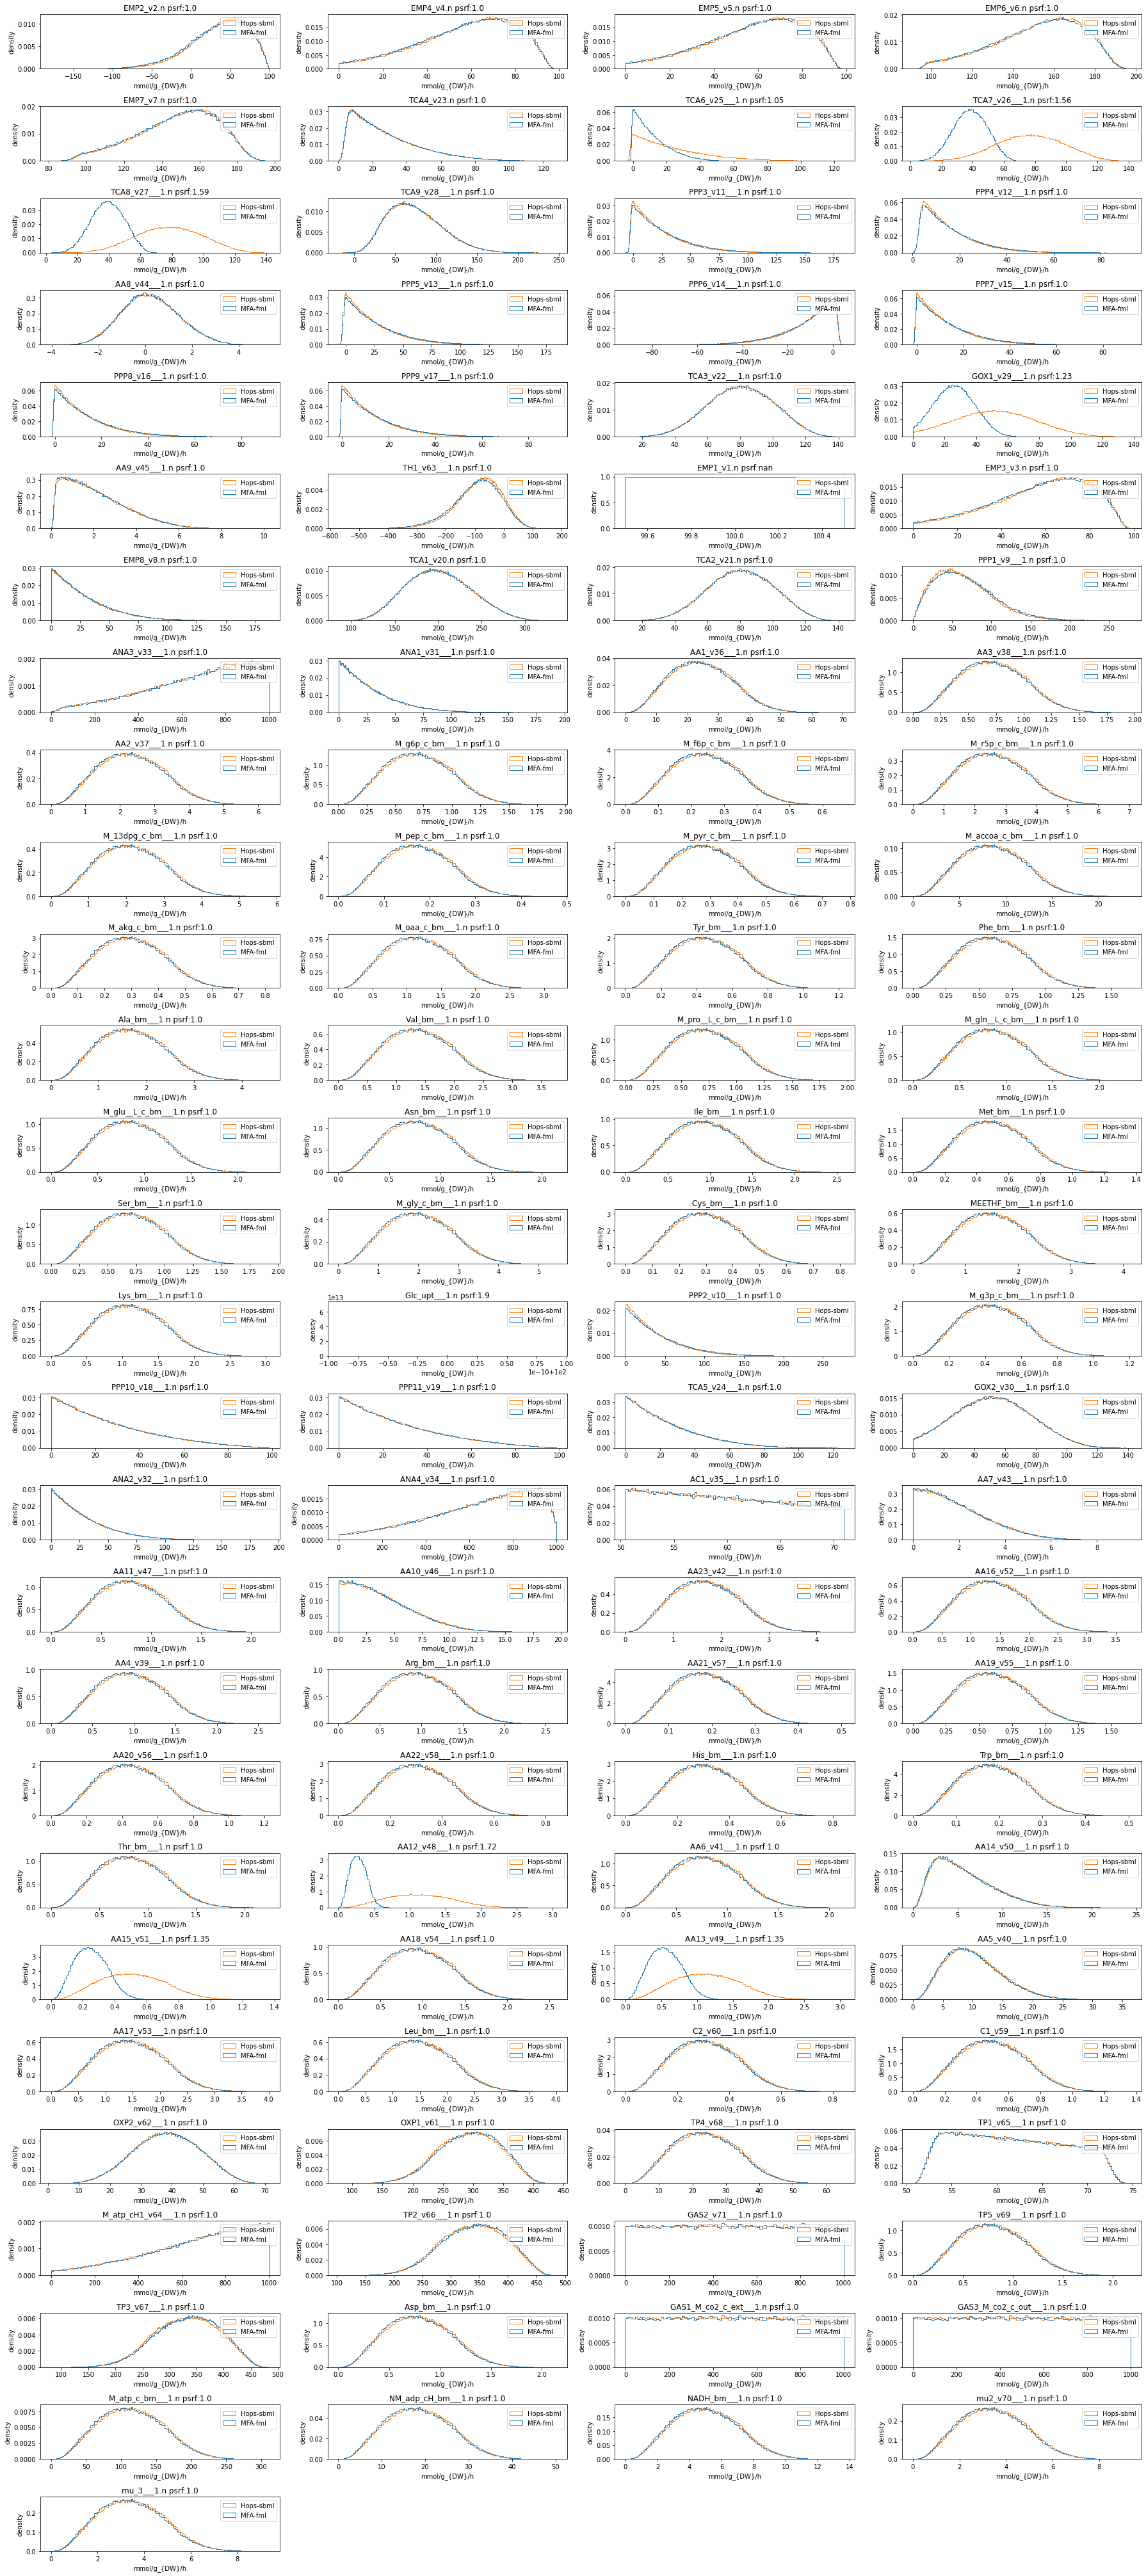

In [106]:
num_rxns = len(g)
n_cols = 4
n_rows = math.ceil(num_rxns / n_cols)

fig=plt.figure(figsize=(25, 2*n_rows))
j=0
for i in g:
    ax=fig.add_subplot(n_rows,n_cols,j+1)
    ax.hist([NewNets[i],hopsTEST[i]],bins='auto', density=True,label = ['MFA-fml', 'Hops-sbml'],histtype = 
    u'step')
    #
    #ax.hist(, bins=20, density=True)
    ax.set_title(str(i)+" psrf:"+str(rhatsU[j]))
    #
    ax.set_xlabel('mmol/g_{DW}/h')
    ax.set_ylabel('density')
    ax.legend()
    j+=1
fig.tight_layout()
plt.show()

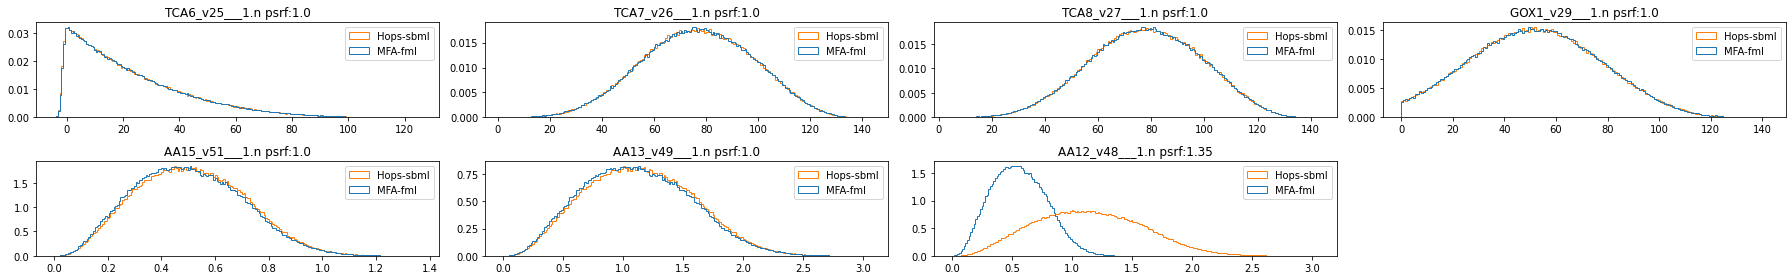

In [99]:
ANOMS = ["TCA6_v25___1.n" , "TCA7_v26___1.n" , "TCA8_v27___1.n" , "GOX1_v29___1.n" , "AA15_v51___1.n" , "AA13_v49___1.n" , "AA12_v48___1.n"]
from scipy.stats import entropy
rhatsU = []
#kls=[]
for i in ANOMS:
    df = pd.DataFrame()
    seed1 = NewNets[i]*2
    seed2 = hopsTEST[i]
    df =df.append(seed1).append(seed2)
    b = df.to_numpy()
    r= az.rhat(b)
    #kl = entropy(seed1,seed5)
    rhatsU.append(round(r,2))
    #kls.append(round(kl,2))
num_rxns = len(ANOMS)
n_cols = 4
n_rows = math.ceil(num_rxns / n_cols)

fig=plt.figure(figsize=(25, 2*n_rows))
j=0
for i in ANOMS:
    ax=fig.add_subplot(n_rows,n_cols,j+1)
    ax.hist([2*NewNets[i],hopsTEST[i]],bins='auto', density=True,label = ['MFA-fml', 'Hops-sbml'],histtype = 
    u'step')
    #
    #ax.hist(, bins=20, density=True)
    ax.set_title(str(i)+" psrf:"+str(rhatsU[j]))
    #
    ax.set_xlabel('mmol/g_{DW}/h')
    ax.set_ylabel('density')
    ax.legend()
    j+=1

fig.tight_layout()
plt.show()